In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import os 


In [70]:
path = os.getcwd()
data = pd.read_csv(path+'/dados_coletados.csv')
data = data.iloc[:,1:]
data.head()

,dates,uf,state,cases,deaths,suspects,refuses
0,2020-02-26,CE,Ceará,0.0,0.0,0.0,1.0
1,2020-02-26,BA,Bahia,0.0,0.0,0.0,2.0
2,2020-02-26,PB,Paraíba,0.0,0.0,1.0,0.0
3,2020-02-26,PE,Pernambuco,0.0,0.0,1.0,0.0
4,2020-02-26,MG,Minas Gerais,0.0,0.0,2.0,2.0


In [71]:
sp = data[data['uf']=='SP']
sp

,dates,uf,state,cases,deaths,suspects,refuses
7,2020-02-26,SP,São Paulo,1.0,0.0,11.0,28.0
21,2020-02-27,SP,São Paulo,1.0,0.0,55.0,28.0
37,2020-02-28,SP,São Paulo,1.0,0.0,66.0,30.0
53,2020-02-29,SP,São Paulo,2.0,0.0,91.0,38.0
69,2020-03-01,SP,São Paulo,2.0,0.0,136.0,48.0
91,2020-03-02,SP,São Paulo,2.0,0.0,163.0,48.0
114,2020-03-03,SP,São Paulo,2.0,0.0,130.0,104.0
137,2020-03-04,SP,São Paulo,3.0,0.0,135.0,131.0
160,2020-03-05,SP,São Paulo,6.0,0.0,182.0,159.0
183,2020-03-06,SP,São Paulo,10.0,0.0,222.0,189.0


1132.8461538461538
1796.7120853312315
1193.6979968130072


<IPython.core.display.Javascript object>


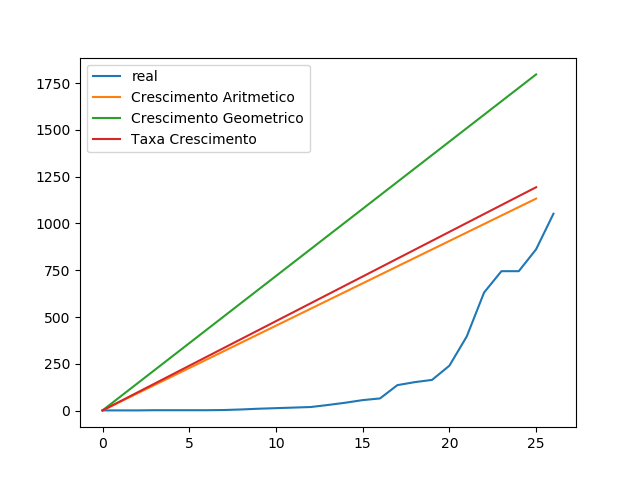

1052.0


In [72]:
def pa(t,p0,p2,t0,t2):
    ka = (p2-p0)/(t2-t0)
    return p0 + ka*(t-t0)

def pg(t,p0,p2,t0,t2):
    kg = (np.log(p2)-np.log(p0))/(t2-t0)
    return p0*np.exp(1)**(kg*(t-t0))

def pt(p0,p1,p2,t,t0,t2):
    ps = (2*p0*p1*p2-p1**2*(p0+p2))/(p0*p2-p1**2)
    kd = (-np.log((ps-p2)/(ps-p0))/(t2-t0))
    return p0 + (ps-p0)*(1-np.exp(1)**(-kd*(t-t0)))

def cl(p0,p1,p2,t,t0,t1,t2):
    ps = (2*p0*p1*p2-p1**2*(p0+p2))/(p0*p2-p1**2)
    c = (ps-p0)/p0
    k1 = (1/(t2-t1))*(np.log((p0*(ps-p1)/(p1*(ps-p0)))))
    return ps/(1+c*np.exp(1)**(k1*(t-t0)))

d = sp['cases'].to_numpy()
t0,t1,t2 = 1,13,27
p0,p1,p2 = d[0],d[12],d[-1]

t = 29



print(pa(t,p0,p2,t0,t2))
print(pg(t,p0,p2,t0,t2))
print(pt(p0,p1,p2,t,t0,t2))
# print(cl(p0,p1,p2,t,t0,t1,t2))

plt.plot(d,label='real')
plt.plot(np.linspace(1,pa(t,p0,p2,t0,t2),26),label='Crescimento Aritmetico')
plt.plot(np.linspace(1,pg(t,p0,p2,t0,t2),26),label='Crescimento Geometrico')
plt.plot(np.linspace(1,pt(p0,p1,p2,t,t0,t2),26),label='Taxa Crescimento')
plt.legend()
print(d[26])

In [73]:
# REAL - 28 de março
real = [
    {
        "uid": 35,
            "uf": "SP",
            "state": "São Paulo",
            "cases": 1406,
            "deaths": 84,
            "suspects": 5334,
            "refuses": 596,
            "datetime": "2020-03-28T21:33:34.708Z"
        },
        {
            "uid": 33,
            "uf": "RJ",
            "state": "Rio de Janeiro",
            "cases": 558,
            "deaths": 13,
            "suspects": 1254,
            "refuses": 148,
            "datetime": "2020-03-28T21:33:34.708Z"
        },
        {
            "uid": 23,
            "uf": "CE",
            "state": "Ceará",
            "cases": 314,
            "deaths": 4,
            "suspects": 493,
            "refuses": 89,
            "datetime": "2020-03-28T21:33:34.708Z"
        },
  
        {
            "uid": 31,
            "uf": "MG",
            "state": "Minas Gerais",
            "cases": 205,
            "deaths": 0,
            "suspects": 925,
            "refuses": 104,
            "datetime": "2020-03-28T21:33:34.708Z"
        },
        {
            "uid": 24,
            "uf": "RN",
            "state": "Rio Grande do Norte",
            "cases": 45,
            "deaths": 0,
            "suspects": 108,
            "refuses": 22,
            "datetime": "2020-03-28T21:33:34.708Z"
        },
        {
            "uid": 21,
            "uf": "MA",
            "state": "Maranhão",
            "cases": 14,
            "deaths": 0,
            "suspects": 125,
            "refuses": 13,
            "datetime": "2020-03-28T21:33:34.708Z"
        }
    ]
